In [1]:
import os
import sys
sys.path.append('/Users/wangqiqian/Desktop/TrafficTDApython/')

current_dir_path = os.getcwd()
current_file_path = os.path.abspath(current_dir_path)
current_dir_path = os.path.dirname(current_file_path)
parent_dir_path = os.path.dirname(current_dir_path)

# os.chdir(current_dir_path + '\\ultils')
os.chdir(current_dir_path + '/ultils')
print(current_dir_path)

import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from functions import *
from chi import *
from regressionP import *
from models import *
from utils_v3 import *

os.chdir('/Users/wangqiqian/Desktop/TrafficTDApython/')
# os.chdir('C:/Users/USER/Desktop/TrafficTDApython/')

from Version3.tdamapper.core import MapperAlgorithm
from Version3.tdamapper.cover import CubicalCover
from Version3.tdamapper.clustering import FailSafeClustering
from Version3.tdamapper.plot import MapperLayoutInteractive

/Users/wangqiqian/Desktop/TrafficTDApython


In [2]:
data1 = pd.read_csv("Data/NPA_TMA2_1.csv", low_memory=False)[:-2]
data2 = pd.read_csv("Data/NPA_TMA2_2.csv", low_memory=False)[:-2]
data3 = pd.read_csv("Data/NPA_TMA2_3.csv", low_memory=False)[:-2]
data4 = pd.read_csv("Data/NPA_TMA2_4_new.csv", low_memory=False)[:-2]
data5 = pd.read_csv("Data/NPA_TMA2_5.csv", low_memory=False)[:-2]
data6 = pd.read_csv("Data/NPA_TMA2_6_new.csv", low_memory=False)[:-2]
data7 = pd.read_csv("Data/NPA_TMA2_7.csv", low_memory=False)[:-2]
data8 = pd.read_csv("Data/NPA_TMA2_8.csv", low_memory=False)[:-2]
data9 = pd.read_csv("Data/NPA_TMA2_9.csv", low_memory=False)[:-2]
data10 = pd.read_csv("Data/NPA_TMA2_10.csv", low_memory=False)[:-2]

dataA2 = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], ignore_index=True)
# dataA2 = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)

dataA1 = pd.read_csv("Data/NPA_TMA1_V3.csv")[:-2]

In [3]:
dataA1.columns

Index(['發生年度', '發生月份', '發生日期', '發生時間', '事故類別名稱', '處理單位名稱警局層', '發生地點', '天候名稱',
       '光線名稱', '道路類別-第1當事者-名稱', '速限-第1當事者', '道路型態大類別名稱', '道路型態子類別名稱',
       '事故位置大類別名稱', '事故位置子類別名稱', '路面狀況-路面鋪裝名稱', '路面狀況-路面狀態名稱', '路面狀況-路面缺陷名稱',
       '道路障礙-障礙物名稱', '道路障礙-視距品質名稱', '道路障礙-視距名稱', '號誌-號誌種類名稱', '號誌-號誌動作名稱',
       '車道劃分設施-分向設施大類別名稱', '車道劃分設施-分向設施子類別名稱', '車道劃分設施-分道設施-快車道或一般車道間名稱',
       '車道劃分設施-分道設施-快慢車道間名稱', '車道劃分設施-分道設施-路面邊線名稱', '事故類型及型態大類別名稱',
       '事故類型及型態子類別名稱', '肇因研判大類別名稱-主要', '肇因研判子類別名稱-主要', '死亡受傷人數', '當事者順位',
       '當事者區分-類別-大類別名稱-車種', '當事者區分-類別-子類別名稱-車種', '當事者屬-性-別名稱', '當事者事故發生時年齡',
       '保護裝備名稱', '行動電話或電腦或其他相類功能裝置名稱', '當事者行動狀態大類別名稱', '當事者行動狀態子類別名稱',
       '車輛撞擊部位大類別名稱-最初', '車輛撞擊部位子類別名稱-最初', '車輛撞擊部位大類別名稱-其他', '車輛撞擊部位子類別名稱-其他',
       '肇因研判大類別名稱-個別', '肇因研判子類別名稱-個別', '肇事逃逸類別名稱-是否肇逃', '經度', '緯度'],
      dtype='object')

In [3]:
select_lst = [
    '道路類別-第1當事者-名稱', '速限-第1當事者', '道路型態大類別名稱', '道路型態子類別名稱',
    '事故位置大類別名稱', '事故位置子類別名稱', '路面狀況-路面鋪裝名稱', '路面狀況-路面狀態名稱', '路面狀況-路面缺陷名稱',
    '道路障礙-障礙物名稱', '道路障礙-視距品質名稱', '道路障礙-視距名稱', '號誌-號誌種類名稱', '號誌-號誌動作名稱',
    '車道劃分設施-分向設施大類別名稱', '車道劃分設施-分向設施子類別名稱', '車道劃分設施-分道設施-快車道或一般車道間名稱',
    '車道劃分設施-分道設施-快慢車道間名稱', '車道劃分設施-分道設施-路面邊線名稱', '事故類型及型態大類別名稱',
    '事故類型及型態子類別名稱', '死亡受傷人數',
    '肇因研判子類別名稱-個別'
    # '經度', '緯度'
]

def preprocess(input_data, select_lst):
    
    sample_data = input_data[input_data['當事者順位'] == 1].reset_index(drop=True, inplace=False)
    sample_data = sample_data[sample_data['發生月份'] < 11]
    dataA = sample_data[select_lst]
    
    # 將資料分出死亡和受傷，合併到原本的資料後去除多餘的死亡受傷人數
    death_injury_data = split_death_injury(dataA['死亡受傷人數'])
    dist_df = pd.concat([dataA, death_injury_data], axis=1)
    dist_df.drop(columns=['死亡受傷人數'], inplace=True)
    
    return dist_df

dist_dfA1 = preprocess(dataA1, select_lst)
dist_dfA2 = preprocess(dataA2, select_lst)
# Concat
rbind_data = pd.concat([dist_dfA1, dist_dfA2], axis=0, ignore_index=True)

# Sample
# rbind_data = rbind_data.sample(frac=0.3, random_state=43)
# sample_data_to_map.reset_index(drop=True, inplace=True)

# assert rbind_data.shape[0] == dist_dfA1.shape[0] + dist_dfA2.shape[0]
# Dummy
rbind_data["速限-第1當事者"] = rbind_data["速限-第1當事者"].astype(str)
dummy_data = pd.get_dummies(rbind_data)

print('dummy_data:', dummy_data.shape)

data_to_map = dummy_data.drop(['死亡', '受傷'], axis=1)
mapper_numpy = data_to_map.to_numpy()

dummy_data: (312760, 322)


### Multiple correspondence analysis (MCA)
多重對應分析是專門針對dummy來進行降維的，所以使用它作為主要方法沒有問題

In [4]:
import prince

mca = prince.MCA(
    one_hot=False,
    n_components=7,
    n_iter=30,
    copy=True,
    check_input=True,
    random_state=42
)

mca.fit(data_to_map)
lens = mca.transform(data_to_map)

print(mca.eigenvalues_summary)
# mca.column_contributions_.head().style.format('{:.0%}')

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.259         1.91%                      1.91%
1              0.182         1.34%                      3.26%
2              0.166         1.23%                      4.48%
3              0.146         1.08%                      5.56%
4              0.130         0.96%                      6.52%
5              0.118         0.87%                      7.40%
6              0.109         0.81%                      8.20%


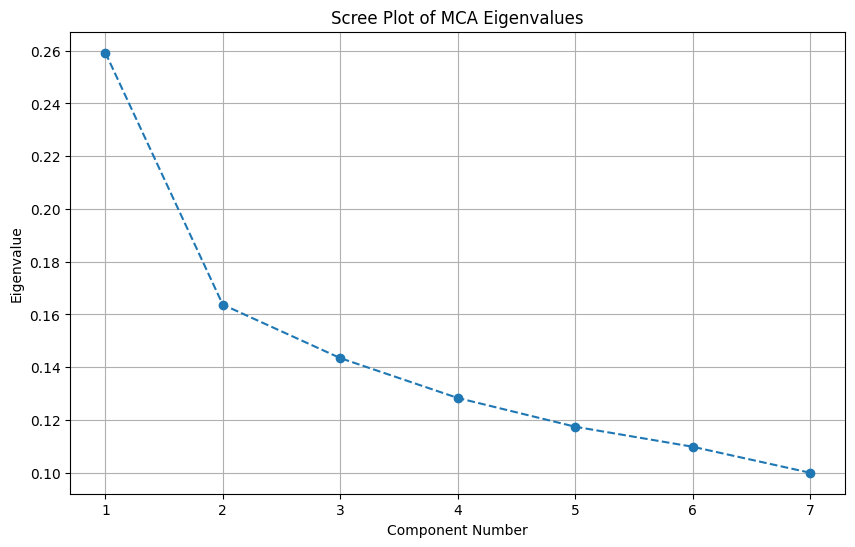

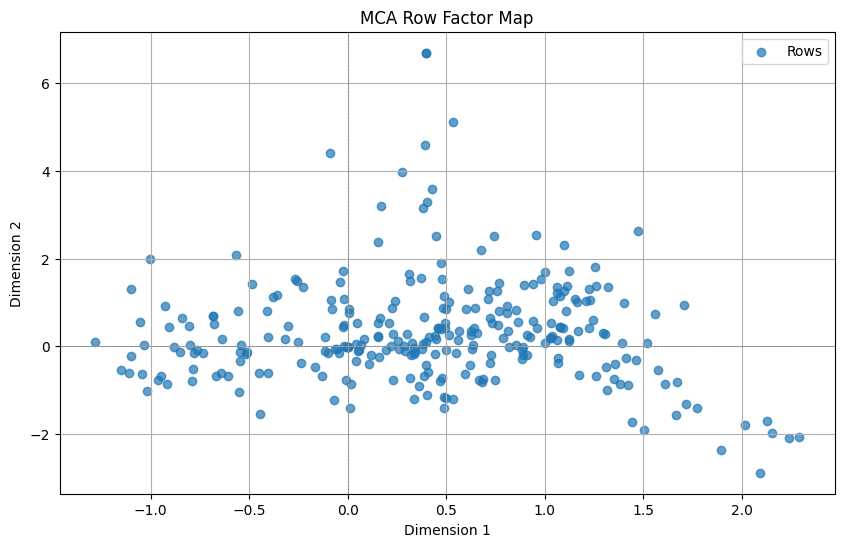

In [5]:
import matplotlib.pyplot as plt

# Generate the scree plot for MCA eigenvalues
eigenvalues = mca.eigenvalues_

# Plot the eigenvalues to show the variance explained by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title("Scree Plot of MCA Eigenvalues")
plt.xlabel("Component Number")
plt.ylabel("Eigenvalue")
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()

# Generate MCA row/column factor map
# coordinates = mca.row_coordinates(MCA_X)
col_coordinate = mca.column_coordinates(MCA_X)
plt.figure(figsize=(10, 6))
plt.scatter(col_coordinate[0], col_coordinate[1], alpha=0.7, label="Rows")

# Label the plot
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.title("MCA Row Factor Map")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.legend()
plt.show()

# Find the best mapper

Best interval for overlap=3: 9
Best interval for overlap=4: 7
Best interval for overlap=5: 8

In [5]:
detailed_results = []

# for overlap in range(3, 6):
for overlap in range(5, 6):
    silhouette_for_intervals = []

    # for interval in range(5, 11):
    for interval in range(6, 7):
        print(f'overlap: {overlap}, interval: {interval}')
        mapper_algo = MapperAlgorithm(
            cover=CubicalCover(
                n_intervals=interval,
                overlap_frac=overlap / 10
            ),
            clustering=FailSafeClustering(
                AgglomerativeClustering(
                n_clusters=2,
                linkage='single'
                )
            )
        )

        mapper_info = mapper_algo.fit_transform(mapper_numpy, lens)
        silhouette_for_intervals.append(mapper_info[1])

        detailed_results.append({
            "overlap": overlap,
            "interval": interval,
            "silhouette": mapper_info[1],
            "mapper_info": mapper_info
        })
 
    best_interval = np.argmax(silhouette_for_intervals) + 5  # +5 因為 interval 從5開始

    print(silhouette_for_intervals)
    print(f"Best interval for overlap={overlap}: {best_interval}")

overlap: 5, interval: 6


Processing Clusters: 100%|██████████| 61/61 [1:12:04<00:00, 70.89s/it] 


[0.1743134890963673]
Best interval for overlap=5: 5


1. full_grid：使用Interval優化的前兩個月grid search
2. full_grid_sample：抽樣30%資料且沒有使用Interval優化
3. full_grid_sample_r2：和第二點一樣但是第二回合
4. full_grid_fulldata_o5i6：整筆資料的拓樸使用覆蓋為5區間數為6

In [7]:
# detailed_results_df = pd.DataFrame(detailed_results)
# detailed_results_df.to_csv("/Users/wangqiqian/Desktop/TrafficTDApython/Version3/GridSearch/full_grid_fulldata_o5i6.csv", index=False)

# output_file = '/Users/wangqiqian/Desktop/TrafficTDApython/Version3/GridSearch/full_grid_fulldata_o5i6.pkl'
# with open(output_file, 'wb') as f:
#     pickle.dump(detailed_results_df, f)

# print(f"Results saved to {output_file}")

Results saved to /Users/wangqiqian/Desktop/TrafficTDApython/Version3/GridSearch/full_grid_fulldata_o5i6.pkl


In [17]:
with open('/Users/wangqiqian/Desktop/TrafficTDApython/Version3/GridSearch/full_grid_sample_r2.pkl', 'rb') as f:
    detailed_results_df = pickle.load(f)

detailed_results_df = detailed_results_df.sort_values(by='silhouette')
detailed_results_df

,overlap,interval,silhouette,mapper_info
14,5,7,0.169305,"((0, 6, 152, 2, 4, 244, 14, 18, 22, 298, 8, 34..."
12,5,5,0.174488,"((0, 4, 24, 70, 136, 157, 2, 10, 32, 46, 52, 8..."
11,4,10,0.216015,"((0, 181, 280, 582, 6, 28, 171, 231, 239, 257,..."
7,4,6,0.218514,"((0, 154, 232, 318, 370, 382, 46, 106, 187, 41..."
8,4,7,0.220591,"((0, 6, 34, 54, 410, 20, 107, 183, 185, 252, 2..."
3,3,8,0.223035,"((0, 84, 899, 6, 8, 22, 62, 120, 145, 207, 243..."
10,4,9,0.224507,"((0, 2, 8, 44, 298, 314, 389, 419, 551, 4, 36,..."
4,3,9,0.227380,"((0, 2, 8, 54, 76, 94, 160, 325, 386, 520, 550..."
16,5,9,0.228269,"((0, 4, 34, 183, 310, 2, 12, 16, 196, 64, 380,..."
15,5,8,0.229742,"((0, 6, 427, 16, 78, 231, 2, 175, 257, 403, 4,..."


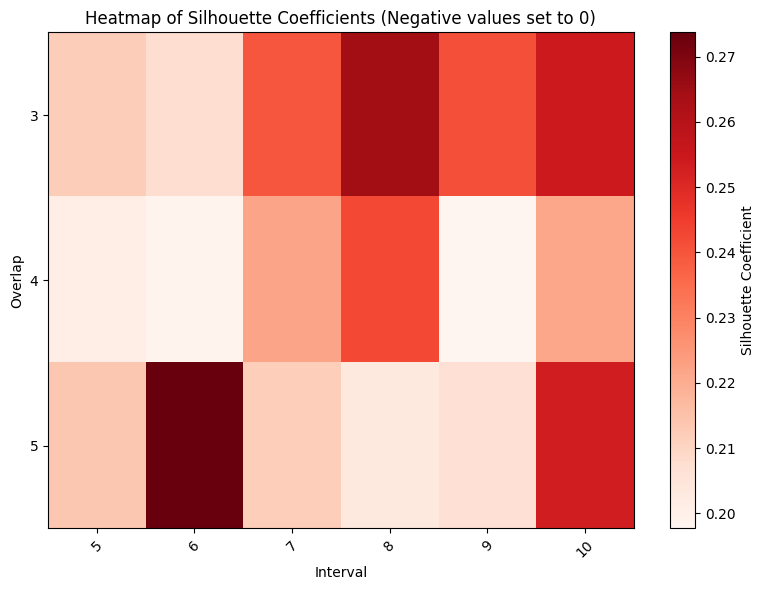

In [10]:
matrix = detailed_results_df.pivot_table(index="overlap", columns="interval", values="silhouette")
# matrix[matrix < 0] = 0

plt.figure(figsize=(8, 6))
plt.imshow(matrix, cmap='Reds', aspect='auto', interpolation='nearest')
plt.colorbar(label='Silhouette Coefficient')
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=45)
plt.yticks(range(len(matrix.index)), matrix.index)
plt.xlabel('Interval')
plt.ylabel('Overlap')
plt.title('Heatmap of Silhouette Coefficients (Negative values set to 0)')
plt.tight_layout()
plt.show()

# Testing for params

In [27]:
mapper_plot1 = MapperLayoutInteractive(
    # detailed_results_df['mapper_info'].iloc[-1][0],
    mapper_info[0],
    colors = rbind_data['死亡'].to_numpy(),
    # colors=rbind_data['肇因研判子類別名稱-個別'].to_numpy(),
    cmap = 'jet',
    agg = average_encoded_label,
    # agg = most_common_encoded_label,
    dim = 3,
    iterations = 50,
    seed = 10,
    width = 800,
    height = 800)

# fig_mean1 = mapper_plot1.plot()
# fig_mean1.show(config={'scrollZoom': True})

In [41]:
def rotate_z(points, theta):
    """
    以 Z 軸為旋轉軸，旋轉點雲。
    :param points: 點的列表或數組，形狀為 (n, 3)，每一行是 [x, y, z]
    :param theta: 旋轉角度（以弧度為單位）
    :return: 旋轉後的點的數組，形狀為 (n, 3)
    """
    # 定義 Z 軸旋轉矩陣
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta),  0],
        [0,             0,              1]
    ])
    
    # 點雲與旋轉矩陣相乘
    rotated_points = np.dot(points, rotation_matrix.T)
    return rotated_points

## Get data info

In [12]:
x = vars(mapper_plot1._MapperLayoutInteractive__fig)['_data_objs'][1]['x']
y = vars(mapper_plot1._MapperLayoutInteractive__fig)['_data_objs'][1]['y']
z = vars(mapper_plot1._MapperLayoutInteractive__fig)['_data_objs'][1]['z']

threeDimData = pd.DataFrame({'x': x, 'y': y, 'z': z})

import re
data_tuple = vars(mapper_plot1._MapperLayoutInteractive__fig)['_data_objs'][1]['text']

data = []
for item in data_tuple:
    # color = int(re.search(r'color: (-?\d+)', item).group(1))
    color = float(re.search(r'color: ([\d.]+)', item).group(1))
    node = int(re.search(r'node: (\d+)', item).group(1))
    size = int(re.search(r'size: (\d+)', item).group(1))
    data.append({'color': color, 'node': node, 'size': size})
component_info = pd.DataFrame(data)

full_info = pd.concat([component_info, threeDimData], axis=1)

mp_content_origin = vars(mapper_plot1._MapperLayoutInteractive__graph)['_node']

mp_content = pd.DataFrame.from_dict(mp_content_origin, orient='index')
mp_content.reset_index(inplace=True)
mp_content.rename(columns={'index': 'node'}, inplace=True)

full_info = pd.merge(full_info, mp_content, on=['node', 'size'], how='inner')

12/01/2024 10:12:07 AM legend WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


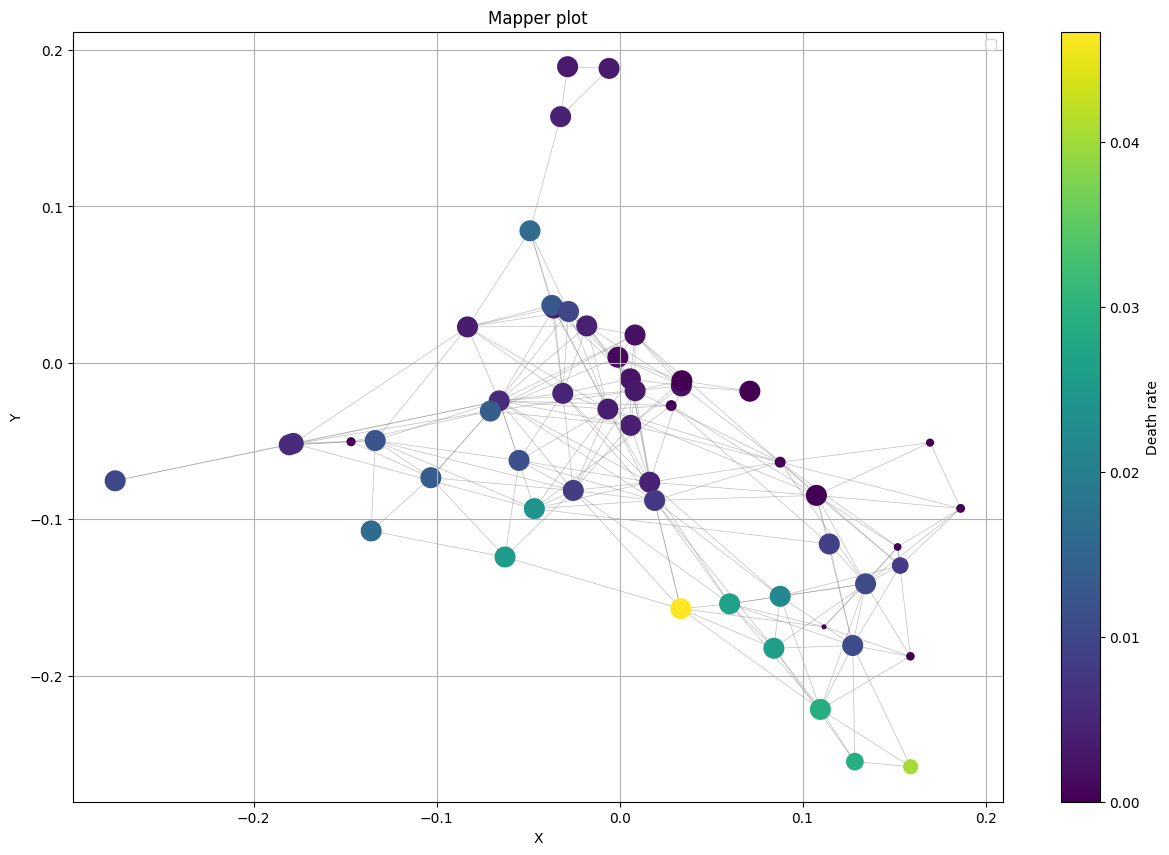

In [26]:
df = full_info[(full_info['size'] > 5)]

# rotate_df = pd.DataFrame(rotate_z(full_info[['x', 'y', 'z']], 20),
#                 columns=['x', 'y', 'z'])

# df[['x', 'y', 'z']] = rotated_df[['x', 'y', 'z']]

clipped_size = np.clip(df['size'], None, 200)

graph = vars(mapper_plot1._MapperLayoutInteractive__graph)
edges = graph['edges']

node_positions = {row['node']: (row['x'], row['z']) for _, row in df.iterrows()}

X = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

plt.figure(figsize=(15, 10))
scatter = plt.scatter(df['x'], df['z'], c=df['color'], cmap='viridis', s=clipped_size, marker='o')

for edge in edges:
    if edge[0] in node_positions and edge[1] in node_positions:
        x_coords = [node_positions[edge[0]][0], node_positions[edge[1]][0]]
        y_coords = [node_positions[edge[0]][1], node_positions[edge[1]][1]]
        plt.plot(x_coords, y_coords, color='grey', alpha=0.5, linewidth=0.5, zorder=0)

colorbar = plt.colorbar(scatter)
colorbar.set_label('Death rate')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mapper plot')

plt.legend()
plt.grid(True)
plt.show()

### Fit model

11/29/2024 03:45:11 PM legend WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


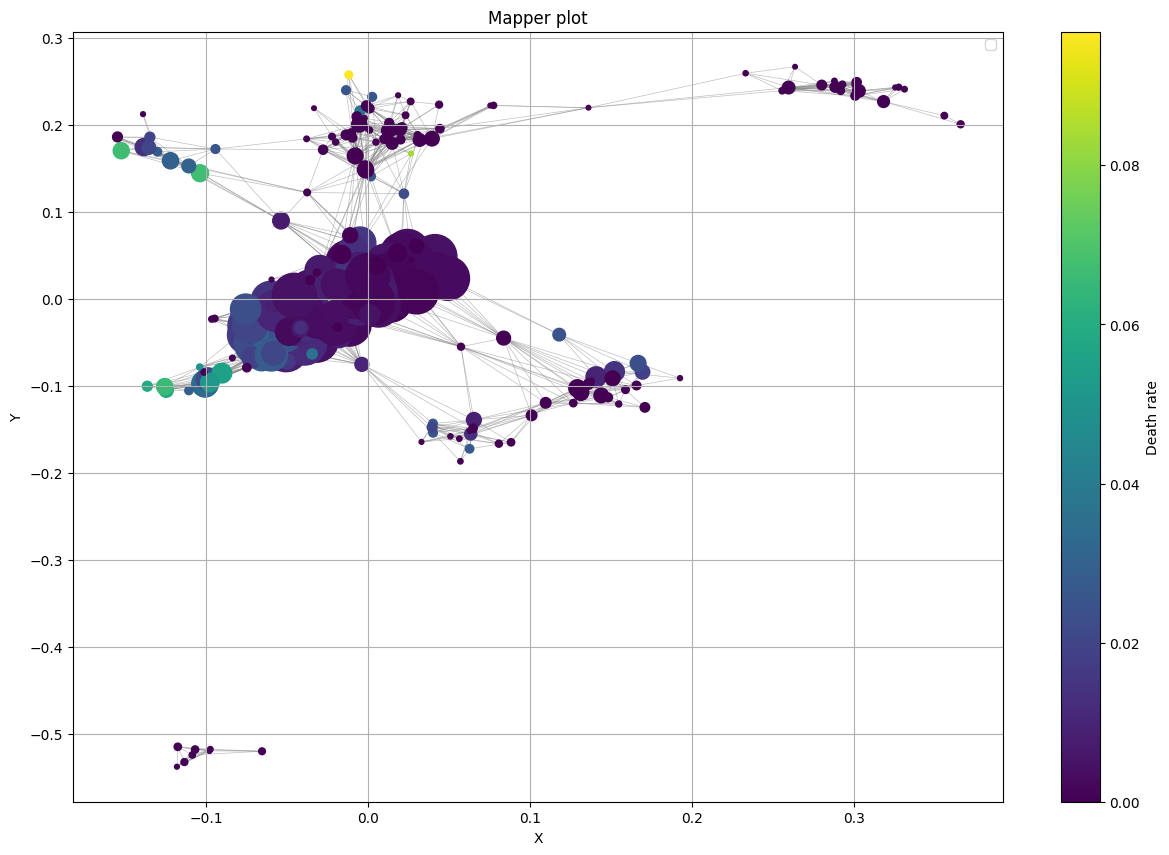

In [22]:
df = full_info[(full_info['size'] > 10)]
clipped_size = np.clip(df['size'], None, 1000)

graph = vars(mapper_plot1._MapperLayoutInteractive__graph)
edges = graph['edges']

node_positions = {row['node']: (row['x'], row['z']) for _, row in df.iterrows()}

X = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

plt.figure(figsize=(15, 10))
scatter = plt.scatter(df['x'], df['z'], c=df['color'], cmap='viridis', s=clipped_size, marker='o')

for edge in edges:
    if edge[0] in node_positions and edge[1] in node_positions:
        x_coords = [node_positions[edge[0]][0], node_positions[edge[1]][0]]
        y_coords = [node_positions[edge[0]][1], node_positions[edge[1]][1]]
        plt.plot(x_coords, y_coords, color='grey', alpha=0.5, linewidth=0.5, zorder=0)

colorbar = plt.colorbar(scatter)
colorbar.set_label('Death rate')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mapper plot')

plt.legend()
plt.grid(True)
plt.show()

# 最高輪廓係數的圖像
多個圖像都有一個共通點，一個主要的中心以及向外分岔的資料點

11/29/2024 11:42:42 AM legend WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


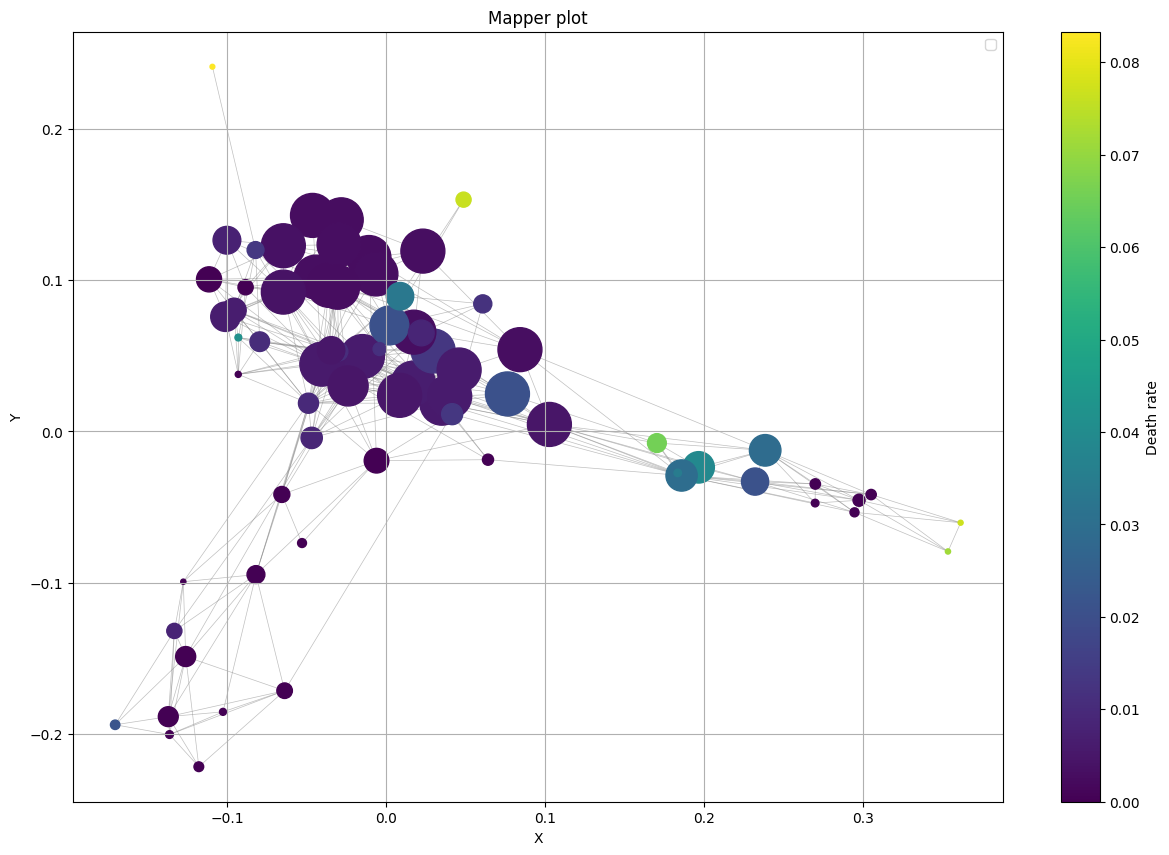

In [34]:
df = full_info[(full_info['size'] > 10)]
clipped_size = np.clip(df['size'], None, 1000)

graph = vars(mapper_plot1._MapperLayoutInteractive__graph)
edges = graph['edges']

node_positions = {row['node']: (row['x'], row['y']) for _, row in df.iterrows()}

X = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = model.predict(x_range_poly)

plt.figure(figsize=(15, 10))
scatter = plt.scatter(df['x'], df['y'], c=df['color'], cmap='viridis', s=clipped_size, marker='o')

# plt.plot(x_range, y_pred, color='red', label=f'Polynomial Fit (degree={degree})')

for edge in edges:
    if edge[0] in node_positions and edge[1] in node_positions:
        x_coords = [node_positions[edge[0]][0], node_positions[edge[1]][0]]
        y_coords = [node_positions[edge[0]][1], node_positions[edge[1]][1]]
        plt.plot(x_coords, y_coords, color='grey', alpha=0.5, linewidth=0.5, zorder=0)

colorbar = plt.colorbar(scatter)
colorbar.set_label('Death rate')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mapper plot')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
calinski_data = get_calinski_from_db(full_info, 0.006)
labels = calinski_data[3]
db = calinski_data[2]
n_clusters_ = calinski_data[4]

print(n_clusters_)

do_plot(full_info, calinski_data, labels, db, n_clusters_)

label_0 = full_info[full_info['label'] == 0]
label_1 = full_info[full_info['label'] == 1]
label_out = full_info[(full_info['label'] != 1) & (full_info['label'] != 0)]

count_0 = get_count_dict(label_0)
count_1 = get_count_dict(label_1)
count_out = get_count_dict(label_out)
full_0 = rbind_data.loc[count_0.keys()]
full_1 = rbind_data.loc[count_1.keys()]
full_out = rbind_data.loc[count_out.keys()]
# 重疊
lst01 = list(count_0.keys() & count_1.keys())
full_01 = full_0.loc[lst01]

full_0 = full_0.drop(lst01)
full_1 = full_1.drop(lst01)

# print('01連接點數量', len(lst01))

full_01.shape[0] + full_0.shape[0] + full_1.shape[0] == rbind_data.shape[0]

In [ ]:
# fig_mean1 = mapper_plot1.plot()
# fig_mean1.show(config={'scrollZoom': True})

In [ ]:
def get_specific_cluster(label):
    
    label_data = full_info[full_info['label'] == label]
    count = get_count_dict(label_data)
    full = rbind_data.loc[count.keys()]
    return full

for i in range(7):
    
    specific_data = get_specific_cluster(i)

    print(specific_data['死亡'].value_counts(normalize = True))

## Chi test

In [ ]:
# full_1#.drop(['緯度'], axis=1)

In [ ]:
result = compare_categorical_features(full_0.drop(['緯度', '經度', '速限-第1當事者'], axis=1), 
                                      full_1.drop(['緯度', '經度', '速限-第1當事者'], axis=1))
result.sort_values(by="chi2", ascending=False)

## 四分位圖

In [ ]:
# latitude_data_full_0 = full_0['經度']
# latitude_data_full_1 = full_1['經度']

# # 繪製四分位圖
# plt.figure(figsize=(10, 6))
# plt.boxplot([latitude_data_full_0, latitude_data_full_1], labels=['full_0', 'full_1'])
# plt.title('緯度的四分位圖')
# plt.ylabel('緯度')
# plt.grid(True)
# plt.show()

## 計數圖

In [ ]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # Window
# plt.rcParams['font.sans-serif']=['Arial Unicode Ms'] # Mac
plt.rcParams['axes.unicode_minus'] = False

injury_distribution = pd.DataFrame({
    'full_0': full_0['號誌-號誌動作名稱'].value_counts(normalize=True),
    'full_1': full_1['號誌-號誌動作名稱'].value_counts(normalize=True)
})

print(injury_distribution)

# 可視化分布差異
injury_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('distribution')
plt.xlabel('injured state')
plt.ylabel('ratio')
plt.show()

## Pickle save

In [ ]:
# import pickle

# with open('../Version3/GridSearch/全部mapper資料.pkl', 'wb') as f:
#     pickle.dump(results, f)

# Example parameters

1. 以圖像為例，較高的interval(10)配上較高的overlap(0.65)有較直觀的效果，而使用clustering方法設為10的華德法也較好，同時範例將PCA設為2。[連結](https://pypi.org/project/tda-mapper/0.2.0/)
2. 但是將PCA調高雖然增加計算量，但是也在interval不設置大麼多的情況下得到好的結果
3. 設置高的clsustering數量可以得出較好的捕捉局部資料lens = PCA(2).fit_transform(X)

In [ ]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True) 

pca = PCA(n_components=2)
lens = pca.fit_transform(X)

explained_variance_ratio  = pca.explained_variance_ratio_
print(sum(explained_variance_ratio))
print(explained_variance_ratio)

In [ ]:
# mapper_algo = MapperAlgorithm(
#     cover=CubicalCover(
#         n_intervals=10,
#         overlap_frac=0.65),
#     clustering = FailSafeClustering(
#         clustering = AgglomerativeClustering(10, linkage='ward'),
#         verbose = False)
# )
# mapper_graph = mapper_algo.fit_transform(X, lens)

# mapper_plot = MapperLayoutInteractive(
#     mapper_graph,
#     colors=y,                       
#     cmap='jet',
#     agg=np.nanmean,
#     dim=3,
#     iterations=400,
#     seed=42,
#     title='digit (mean)',
#     width=600,
#     height=600)

# fig_mean1 = mapper_plot.plot()
# fig_mean1.show(config={'scrollZoom': True})